In [1]:
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import (access_token_secret, access_token, consumer_secret, consumer_key)


In [2]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
target_terms = ['@BBC', '@CBS', '@CNN', '@FoxNews', '@nytimes']

compound_list = []
positive_list = []
negative_list = []
neutral_list = []
name = []
tweet_time = []

for term in target_terms:
    tweet_collection = api.user_timeline(term,count=500)
    tweets_ago = 1
    for tweet in tweet_collection:
        
        results = analyzer.polarity_scores(tweet["text"])
        compound_list.append(results["compound"])
        positive_list.append(results["pos"])
        negative_list.append(results["neg"])
        neutral_list.append(results["neu"])   
        name.append(tweet['user']['name'])
        tweet_time.append(tweets_ago)
        tweets_ago = tweets_ago + 1

In [4]:
result_df = pd.DataFrame({'Name': name,
                         'Compound Score': compound_list,
                         'Positive Score': positive_list,
                         'Negative Score': negative_list,
                         'Neurtral List': neutral_list,
                         'Tweets Ago': tweet_time})
names = result_df['Name'].unique()
name_range = np.arange(0,len(names),1)

BBC = result_df[result_df['Name'] == 'BBC']
CBS = result_df[result_df['Name'] == 'CBS']
CNN = result_df[result_df['Name'] == 'CNN']
FoxNews = result_df[result_df['Name'] == 'FoxNews']
NYtimes = result_df[result_df['Name'] == 'NYtimes']


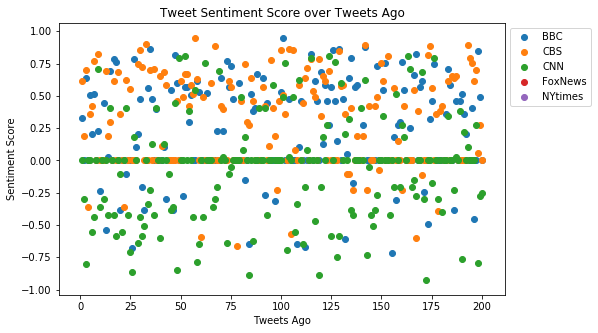

In [5]:
plt.figure(figsize=(8,5))
plt.scatter(BBC['Tweets Ago'],BBC['Compound Score'],label='BBC')
plt.scatter(CBS['Tweets Ago'],CBS['Compound Score'],label='CBS')
plt.scatter(CNN['Tweets Ago'],CNN['Compound Score'],label='CNN')
plt.scatter(FoxNews['Tweets Ago'],FoxNews['Compound Score'],label='FoxNews')
plt.scatter(NYtimes['Tweets Ago'],NYtimes['Compound Score'],label='NYtimes')

plt.xlabel('Tweets Ago')
plt.ylabel('Sentiment Score')
plt.title('Tweet Sentiment Score over Tweets Ago')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [6]:
grouped_df = result_df.groupby(['Name'])
grouped_df.mean()
grouped_df = grouped_df['Compound Score'].mean()
grouped_df.head()

Name
BBC                   0.199757
CBS                   0.279824
CNN                  -0.055710
Fox News             -0.008641
The New York Times   -0.032819
Name: Compound Score, dtype: float64

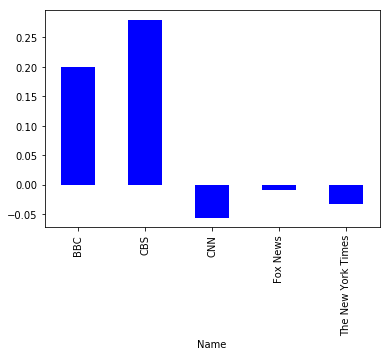

In [7]:
# plt.title('Overall Media Sentiment Based on Twitter')
# plt.ylabel('Tweet Polarity')
# plt.bar(grouped_df['Name'], result_df['Compound Score'], color = ['b','r','y','g','black'])

# plt.show()
result_df.groupby(['Name'])['Compound Score'].mean().plot(kind='bar', color = ('b','r','y','g','black'))
plt.show()